In [1]:
import numpy as np
import io
import numpy as np
import psycopg2
import time
import distortion_routines as dist
from importlib import reload

ImportError: No module named 'mcsActor'

In [2]:
try:
    file = open("/Users/chyan/Documents/workspace/ics_mcsActor/etc/dbpasswd.cfg", "r")
    passstring = file.read()
    print('text="Password reading OK. value = %s."'%(passstring))
except:
    print('text="could not get db password"')

try:
    conn = psycopg2.connect("dbname='fps' user='pfs' host='133.40.164.208' password="+passstring)
    print('text="Connected to FPS database."')
except:
    print('text="I am unable to connect to the database."')
    
    

text="could not get db password"
text="I am unable to connect to the database."


In [5]:
frameId = 209
moveId = 1
cmd_string = f"""select * from mcsEngTable where frameId={frameId} and moveId={moveId}"""

data=np.array([])
n = 0
with conn.cursor() as curs:
        curs.execute(cmd_string)
        rows=curs.fetchall()
        for idx, val in enumerate(rows):
            if idx == 0: data = val 
            if idx != 0: data = np.vstack([data,val])
conn.commit()

In [6]:
centroids=data[:,4:11]

<Figure size 432x288 with 0 Axes>

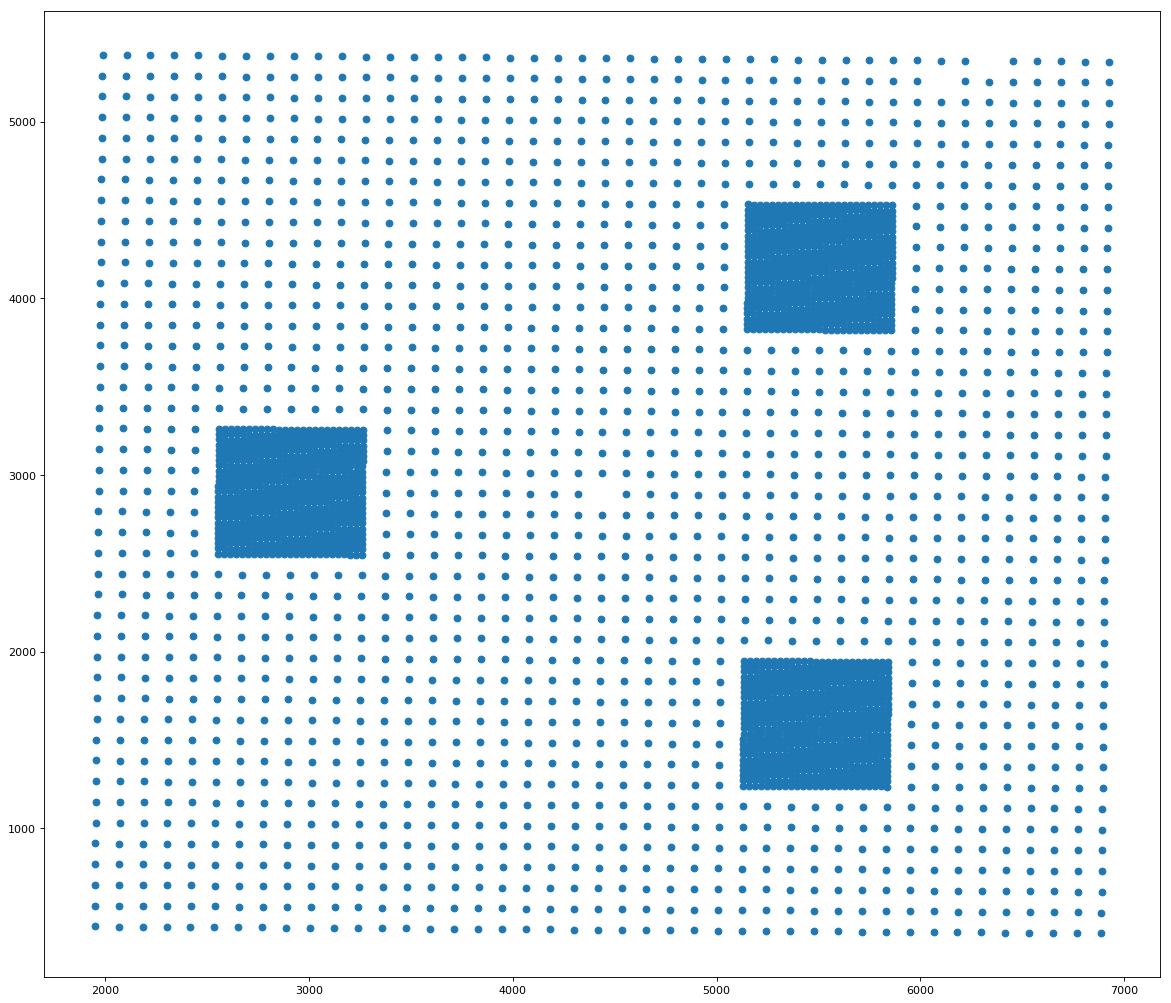

<Figure size 432x288 with 0 Axes>

In [7]:
dist.checkCentroids(centroids[:,1],centroids[:,2],0,'test')